# HW1: Train a precptron model

In this assignemnt we want to design a simple neural network with only one perceptron unit and train it with a simple dataset.

The main goal of this assignment is working with the PyTorch library so you are not allowed to use any loop in your implmentation or even methods from the NumPy library.

**Notes:**
- When you submit your assignment, the output of every cell should be visible.
- You are not eligible to change any parts of the code except the predefined sections.
- You can add your implementation only in the predefined sections.

<br />
<br />
<img src="perceptron.png">

## Getting started
You will start by importing libraries, reading dataset, and visualizing it.

In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

### Load dataset

In [2]:
# Note that if you get an error, you should change the dataset.csv to
# the correct path of the file.
dataset = pd.read_csv('dataset.csv')

In [3]:
# Dataset general information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
 2   y       500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [4]:
# Displaying the five first rows of the dataset
dataset.head()

,x1,x2,y
0,2.780914,3.649500,0
1,0.649471,4.428423,0
2,-3.393311,-1.439415,1
3,3.007704,2.896864,0
4,-3.745867,1.894699,1


### Visualizing dataset

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

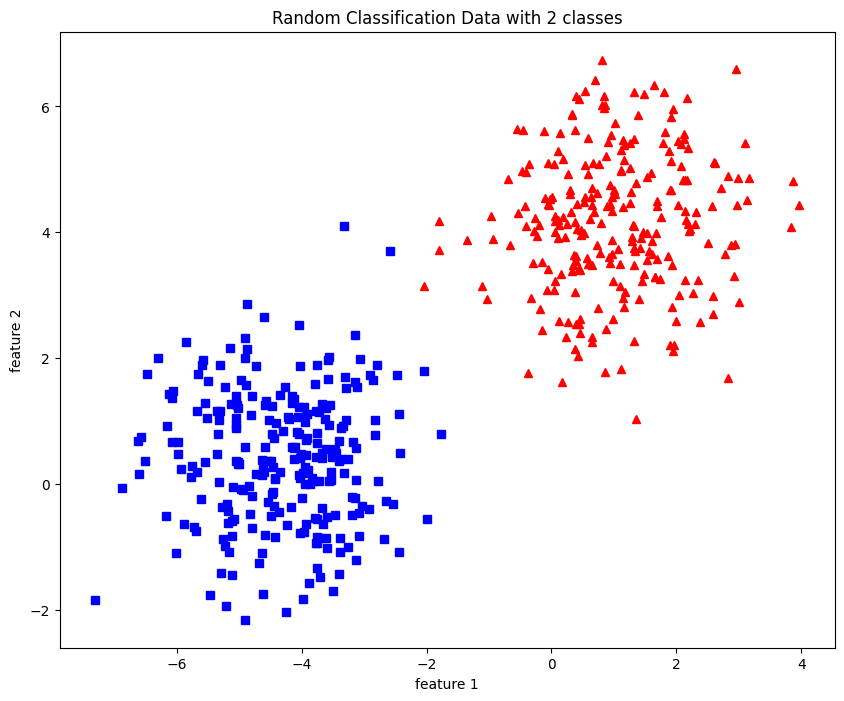

In [5]:
# Plot the dataset
X = dataset.drop(["y"], axis=1).values
y = dataset["y"].values

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

## Implementation of the algorithm
You have two weights and one bias. Let's call them w1, w2, and b. You have to implement gradient decent algorithm for updating these parameters.

Note that you can work with a tensor array with the shape of (3,1) for your parameters.

([[b],[w1],[w2]])

### Initiliazation of the parameters

In [6]:
# Initialize parameters (bias, w1, w2) as zeros
######################################
## code here
parameters = torch.tensor((0,0,0), dtype=torch.float32)
######################################
parameters

tensor([0., 0., 0.])

### Preparing dataset
Pay attention to the first image of this note book. As you can see, the first input is 1. So you should modify your input (X) matrix.

hint : torch.cat()

In [7]:
# Convert data to PyTorch tensors
######################################
## code here
X = torch.tensor(dataset[["x1","x2"]].values, dtype=torch.float32)
y = torch.tensor(dataset["y"].values, dtype=torch.float32)

print(X,end="\n\n")
print(y)
######################################

tensor([[ 2.7809e+00,  3.6495e+00],
        [ 6.4947e-01,  4.4284e+00],
        [-3.3933e+00, -1.4394e+00],
        [ 3.0077e+00,  2.8969e+00],
        [-3.7459e+00,  1.8947e+00],
        [-4.8449e+00, -3.3306e-02],
        [-4.7946e+00,  1.4055e+00],
        [ 2.6747e-01,  2.5786e+00],
        [-3.9157e+00,  7.3661e-01],
        [-4.6300e+00,  3.7390e-01],
        [ 1.4236e+00,  3.7565e+00],
        [ 1.8838e+00,  5.2857e+00],
        [ 6.4606e-01,  4.7080e+00],
        [-3.5216e+00,  1.9148e-01],
        [-2.4713e+00,  1.7322e+00],
        [-6.0754e+00,  6.7073e-01],
        [-3.7286e+00, -8.6071e-01],
        [-3.7637e+00, -9.3903e-01],
        [-4.6050e+00,  2.6502e+00],
        [-2.9170e+00, -3.9277e-01],
        [ 2.0868e-01,  3.9214e+00],
        [-4.7491e-01,  4.9670e+00],
        [ 3.5822e-01,  3.6463e+00],
        [ 1.4553e+00,  3.2259e+00],
        [-2.8321e+00,  1.0157e+00],
        [ 1.6002e+00,  4.9472e+00],
        [-4.4255e+00,  9.5587e-02],
        [ 2.1165e+00,  5.563

In [8]:
######################################
## code here
X0 = torch.ones((X.shape[0], 1), dtype=torch.float32)
X = torch.cat((X0, X), dim=1)
print(X)
######################################

tensor([[ 1.0000,  2.7809,  3.6495],
        [ 1.0000,  0.6495,  4.4284],
        [ 1.0000, -3.3933, -1.4394],
        ...,
        [ 1.0000,  0.8087,  6.0263],
        [ 1.0000, -6.6035,  0.1625],
        [ 1.0000, -2.6523, -0.2790]])


In [9]:
y = y.reshape((-1,1))
y

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
      

### Calculating the output of the perceptron

In [10]:
def calculate_output(X, parameters):
    '''
    Calculate the output of perceptron with unit step activation function
    for all samples
    intput(s):
    X (ndarray): a 2-D array with the shape of (number of samples, 3)
    parameters (ndarray): a 2-D array with the shape of (3, 1)
    output(s):
    y_out (ndarray): a 2-D array with the shape of (number of samples, 1)
    '''
    ##############################################
    ## code here
    ## y_out is the output of your neuron.
    ## First, you should implement matrix multiplicatoin of paramertrs and inputs
    ## Second, you should implement a Unit Step function as an activation function for each element of the y_out
    ## the y_out should be an array with the shape of (500,1).
    ## please note that you are not allowed to use any loop!!!
    y_out = torch.matmul(X, parameters) # (n * 3) * (3 * 1) = n * 1 , n: #samples

    y_out = torch.where(y_out >= 0, 1, 0)

    y_out = y_out.reshape(X.shape[0],1)
    ##############################################

    return y_out

### Implementing the gradient decent algorithm

In [11]:
lr = 0.1  # learning rate
num_epochs = 20

For implmenting the gradient decent algorithm refer to page 17 of perceptron slides.

In [12]:
for i in range(num_epochs):
    y_out = calculate_output(X, parameters)
    errors = 0

    for j in range(X.shape[0]):
        if y[j,0] != y_out[j,0] :
            errors += 1
        ######################################
        ## code here
        ## implement the code for updating each parameter
        ## note that you should calculate all parameters together.
        ## for example, you are not allowed to implement like the bellow:
        ## parameters[0] = ...
        ## paramters[1] = ...
        ## it should be like the bellow:
        ## paramters = ...
        error = y - y_out

        gradients = torch.matmul(X.T, error) 

        parameters = parameters.reshape(3,1)
        parameters += lr * gradients
        ######################################

    print("in epoch : ", i, " errors : ", errors)

in epoch :  0  errors :  250
in epoch :  1  errors :  93
in epoch :  2  errors :  6
in epoch :  3  errors :  5
in epoch :  4  errors :  4
in epoch :  5  errors :  4
in epoch :  6  errors :  3
in epoch :  7  errors :  3
in epoch :  8  errors :  3
in epoch :  9  errors :  3
in epoch :  10  errors :  3
in epoch :  11  errors :  3
in epoch :  12  errors :  3
in epoch :  13  errors :  2
in epoch :  14  errors :  2
in epoch :  15  errors :  2
in epoch :  16  errors :  2
in epoch :  17  errors :  2
in epoch :  18  errors :  2
in epoch :  19  errors :  2


In [13]:
print("Trained Parameters (bias, w1, w2):")
print(parameters)

Trained Parameters (bias, w1, w2):
tensor([[ -5150.1465],
        [-39688.4219],
        [-36518.9258]])


In [14]:
# Extract bias and weights
b = parameters[0]
w1 = parameters[1]
w2 = parameters[2]
X = X[:, 1:]  # Remove the bias term from input matrix
y = y.view(-1)  # Reshape y for plotting

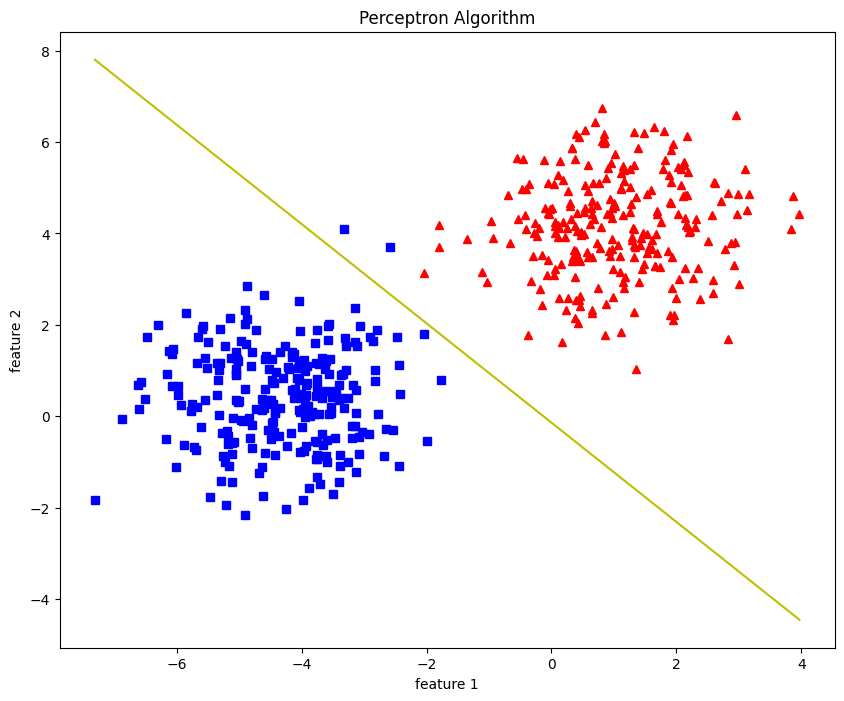

In [15]:
# Plot the result
x1 = [X[:, 0].min().item(), X[:, 0].max().item()]
m = -w1 / w2
c = -b / w2
x2 = m * torch.tensor(x1) + c

fig = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "r^")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Perceptron Algorithm')
plt.plot(x1, x2, 'y-')
plt.show()